In [9]:
using StatsPlots
using DataFrames
using Distributions
using RDatasets

using GraphRecipes
using UnicodePlots

In [5]:
gr()

Plots.GRBackend()

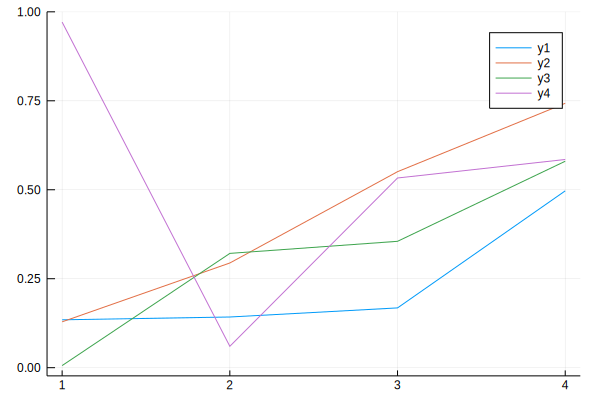

In [6]:
plot(rand(4,4))

In [7]:


# initialize the attractor
n = 1500
dt = 0.02
σ, ρ, β = 10., 28., 8/3
x, y, z = 1., 1., 1.

# initialize a 3D plot with 1 empty series
plt = path3d(1, xlim=(-25,25), ylim=(-25,25), zlim=(0,50),
                xlab = "x", ylab = "y", zlab = "z",
                title = "Lorenz Attractor", marker = 1)

# build an animated gif, saving every 10th frame
@gif for i=1:n
    global x,y,z,σ
    dx = σ*(y - x)     ; x += dt * dx
    dy = x*(ρ - z) - y ; y += dt * dy
    dz = x*y - β*z     ; z += dt * dz
    push!(plt, x, y, z)
end every 10



Base.IOError: IOError: could not spawn `ffmpeg -v 0 -i /var/folders/6f/8_c3l8rn5cb1jn4tmqyq2wl80000gn/T/tmpV3qG5J/%06d.png -vf palettegen=stats_mode=diff -y /var/folders/6f/8_c3l8rn5cb1jn4tmqyq2wl80000gn/T/tmpV3qG5J/palette.bmp`: no such file or directory (ENOENT)

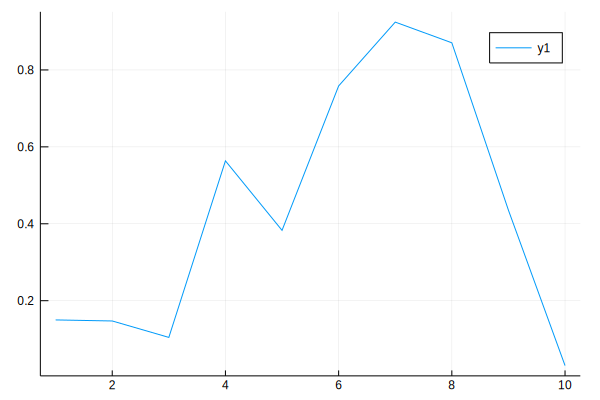

In [8]:
x = 1:10; y = rand(10); # These are the plotting data
plot(x,y)

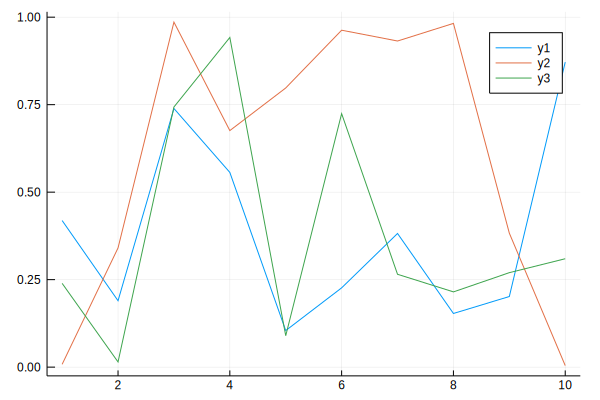

In [10]:
# x 还是一维的，只是 y 变成了 二维，表示两条线
x = 1:10; 
y = rand(10,2) # 2 columns means two lines


plot(x,y)

z = rand(10)
plot!(x,z)

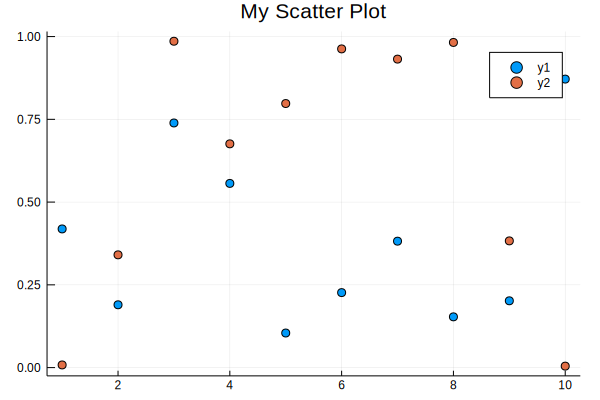

In [11]:
plot(x,y,seriestype=:scatter,title="My Scatter Plot")

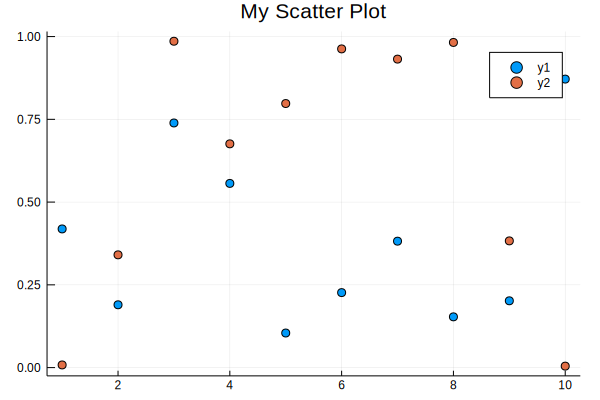

In [12]:
scatter(x,y,title="My Scatter Plot")

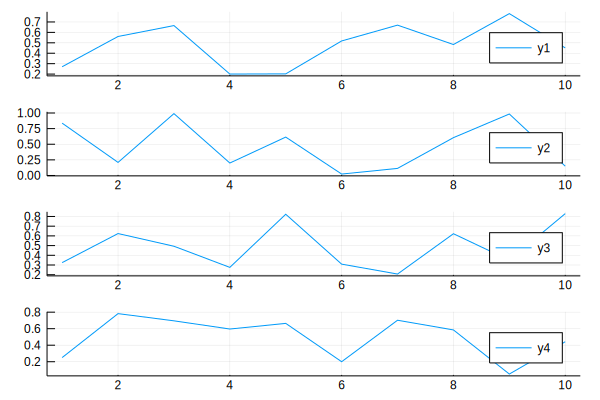

In [13]:
y = rand(10,4)

# 使用 layout 就是单独的 4 个图
plot(x,y,layout=(4,1))

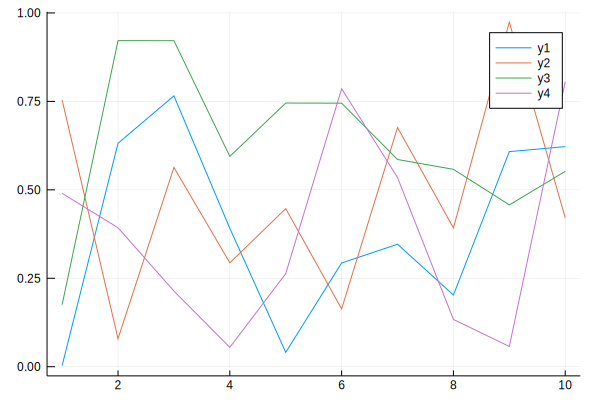

In [14]:
y = rand(10,4)

# 没有 layout，就是一张图上的 4 条线
plot(x,y)

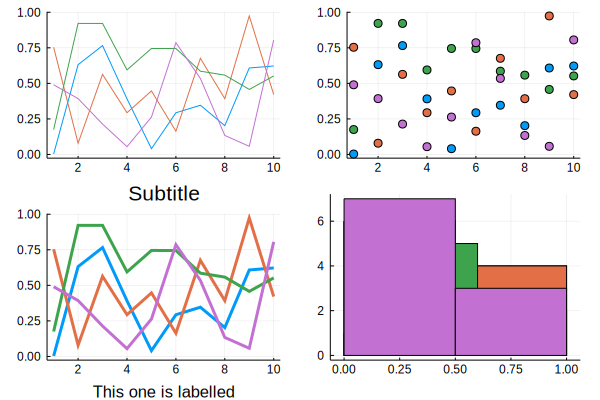

In [15]:
p1 = plot(x,y) # Make a line plot
p2 = scatter(x,y) # Make a scatter plot
p3 = plot(x,y,xlabel="This one is labelled",lw=3,title="Subtitle")
p4 = histogram(x,y) # Four histograms each with 10 points? Why not!
plot(p1,p2,p3,p4,layout=(2,2),legend=false)

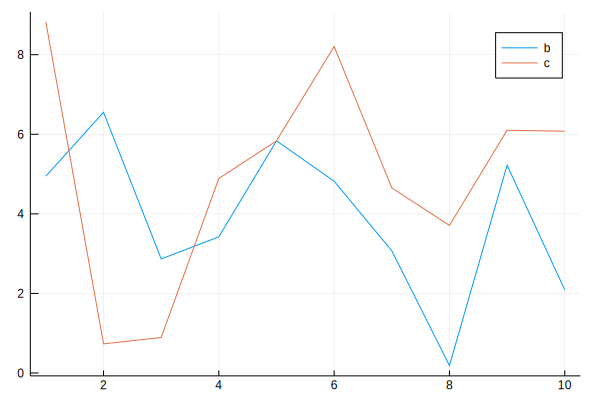

In [18]:
df = DataFrame(a = 1:10, b = 10*rand(10), c = 10 * rand(10))
# Plot the DataFrame by declaring the points by the column names
@df df plot(:a, [:b :c]) # x = :a, y = [:b :c]. Notice this is two columns!

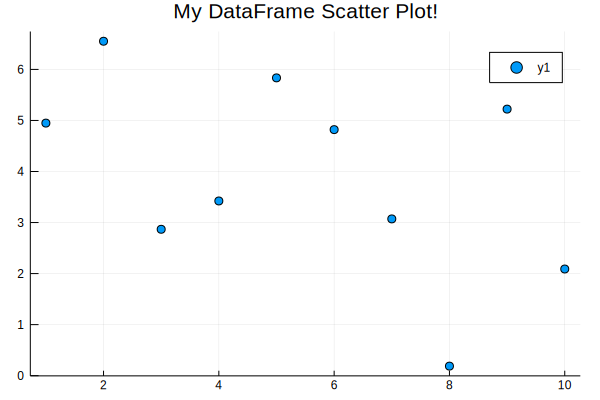

In [19]:
@df df scatter(:a, :b, title="My DataFrame Scatter Plot!") # x = :a, y = :b


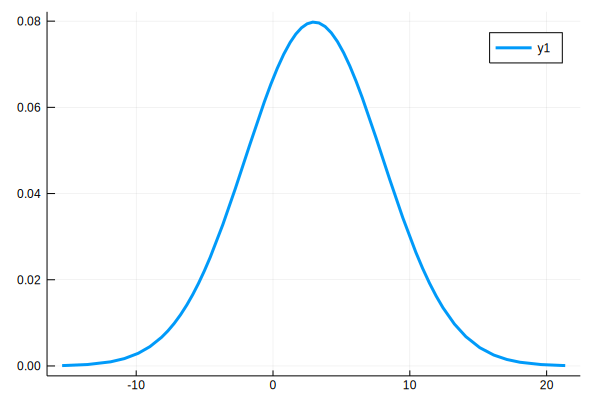

In [21]:
plot(Normal(3,5),lw=3)


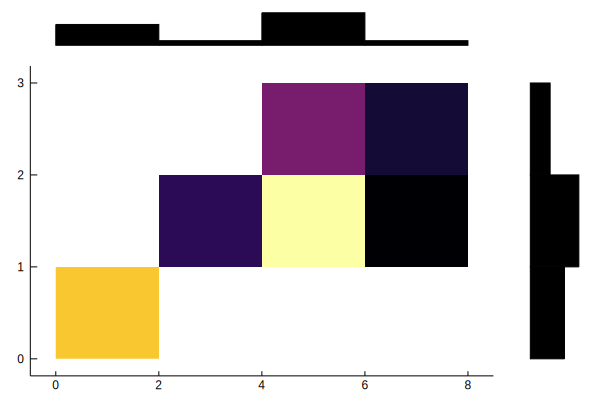

In [24]:
iris = dataset("datasets","iris")

@df iris marginalhist(:PetalLength, :PetalWidth)


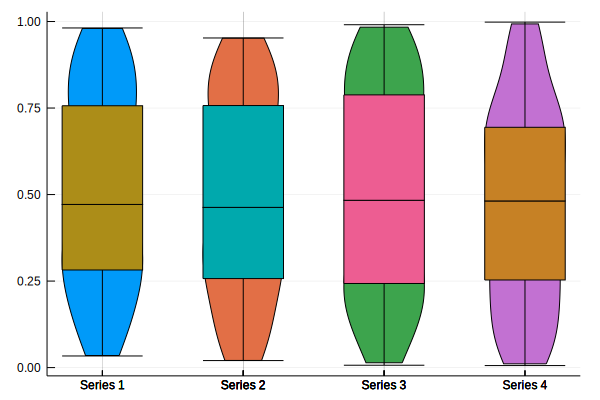

In [26]:
y = rand(100,4) # Four series of 100 points each
violin(["Series 1" "Series 2" "Series 3" "Series 4"],y,leg=false)
boxplot!(["Series 1" "Series 2" "Series 3" "Series 4"],y,leg=false)

In [27]:
fruit = ["peaches", "plums", "blueberries", "strawberries", "bananas"];
bushels = [100, 32, 180, 46, 21];
piechart(x = fruit, y = bushels, holesize = 125)

UndefVarError: UndefVarError: piechart not defined

In [35]:
T = Integer
sups = [T]
sup = T
while sup != Any
    sup = supertype(sup)
    pushfirst!(sups,sup)
end


In [37]:
n = length(sups)
nodes, source, destiny = copy(sups), collect(1:n-1), collect(2:n)
function add_subs!(T, supidx)
    for sub in subtypes(T)
        push!(nodes, sub)
        subidx = length(nodes)
        push!(source, supidx)
        push!(destiny, subidx)
        add_subs!(sub, subidx)
    end
end
add_subs!(T, n)
names = map(string, nodes)


18-element Array{String,1}:
 "Any"     
 "Number"  
 "Real"    
 "Integer" 
 "Bool"    
 "Signed"  
 "BigInt"  
 "Int128"  
 "Int16"   
 "Int32"   
 "Int64"   
 "Int8"    
 "Unsigned"
 "UInt128" 
 "UInt16"  
 "UInt32"  
 "UInt64"  
 "UInt8"   

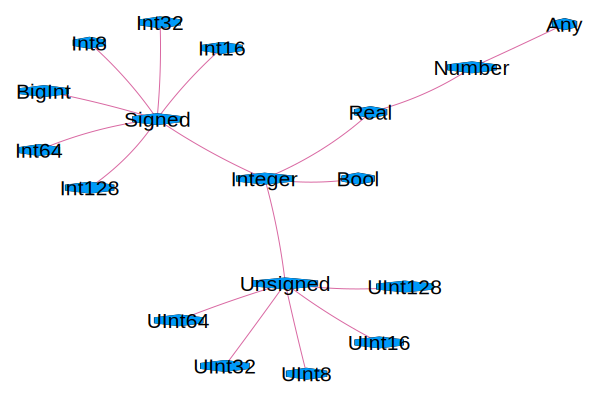

In [40]:
graphplot(source, destiny, names=names)


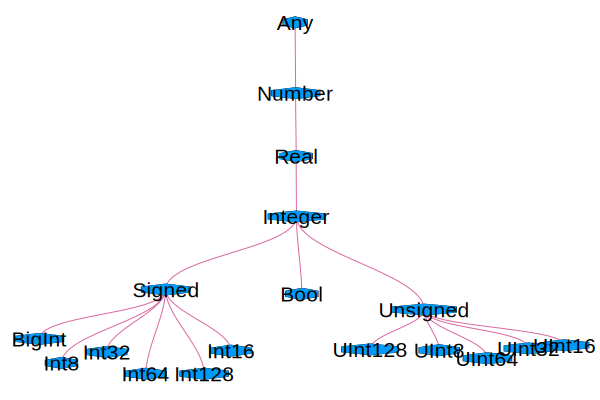

In [41]:
graphplot(source, destiny, names=names, method=:tree)


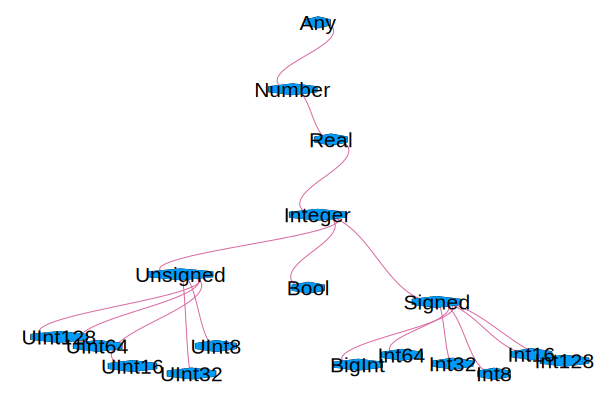

In [42]:
graphplot(source, destiny, names=names, method=:tree, root=:left)


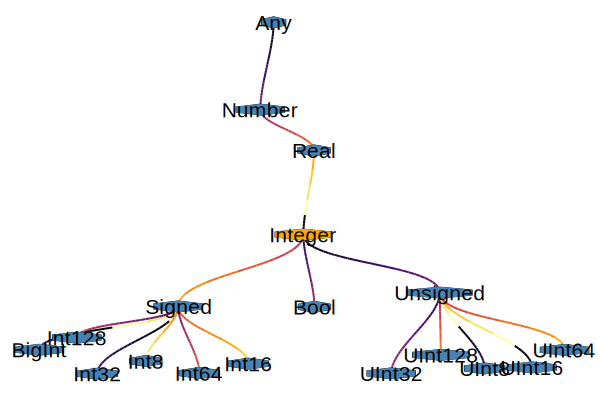

In [45]:
weights = range(1,2,length=length(source))
graphplot(source, destiny, weights,
    names = names, method = :tree,
    l = (2, cgrad()),  # apply the default color gradient to the line (line_z values taken from edge weights)
    m = [node==T ? :orange : :steelblue for node in nodes]     # node colors
)


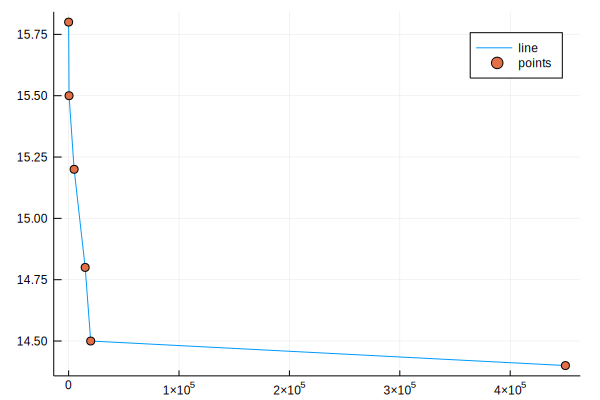

In [8]:
gr()

globaltemperatures = [14.4,14.5,14.8,15.2,15.5,15.8]
numpirates = [450000,20000,15000,5000,400,17]

plot(numpirates, globaltemperatures, label = "line")
scatter!(numpirates, globaltemperatures, label="points")

In [18]:
gr()
unicodeplots()
plot(numpirates, globaltemperatures,label="p", title="t vs p")
scatter!(numpirates, globaltemperatures, label="t")


                                     t vs p
          +------------------------------------------------------------+  
   15.842 | |                                                          | p
          | |                                                          | t
          | |                                                          |  
          | |                                                          |  
          | |                                                          |  
          | |                                                          |  
          | |,                                                         |  
          | ||                                                         |  
          | |.                                                         |  
          | ||                                                         |  
          | |\                                                         |  
          | ||.                                         